<a href="https://colab.research.google.com/github/nuyhc/RhythmStudy/blob/main/DSP_3_%EB%B0%95%EC%A7%80%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

# Loading audio files

In [2]:
debussy_file = "debussy.wav"
redhot_file = "redhot.wav"
duke_file = "duke.wav"

In [ ]:
ipd.Audio(debussy_file)

In [ ]:
ipd.Audio(redhot_file)

In [ ]:
ipd.Audio(duke_file)

In [6]:
# load audio files with librosa
debussy, sr = librosa.load(debussy_file)
redhot, _ = librosa.load(redhot_file)
duke, _ = librosa.load(duke_file)

In [7]:
sr

22050

# Basic information regarding audio files

In [8]:
debussy.shape

(661500,)

In [9]:
# duration in seconds of 1 sample
sample_duration = 1 / sr
print(f"One sample lasts for {sample_duration:6f} seconds")

One sample lasts for 0.000045 seconds


In [10]:
# total number of samples in audio file
tot_samples = len(debussy)
tot_samples

661500

In [11]:
# duration of debussy audio in seconds
duration = 1 / sr * tot_samples
print(f"The audio lasts for {duration} seconds")

The audio lasts for 30.0 seconds


# Visualising audio signal in the time domain

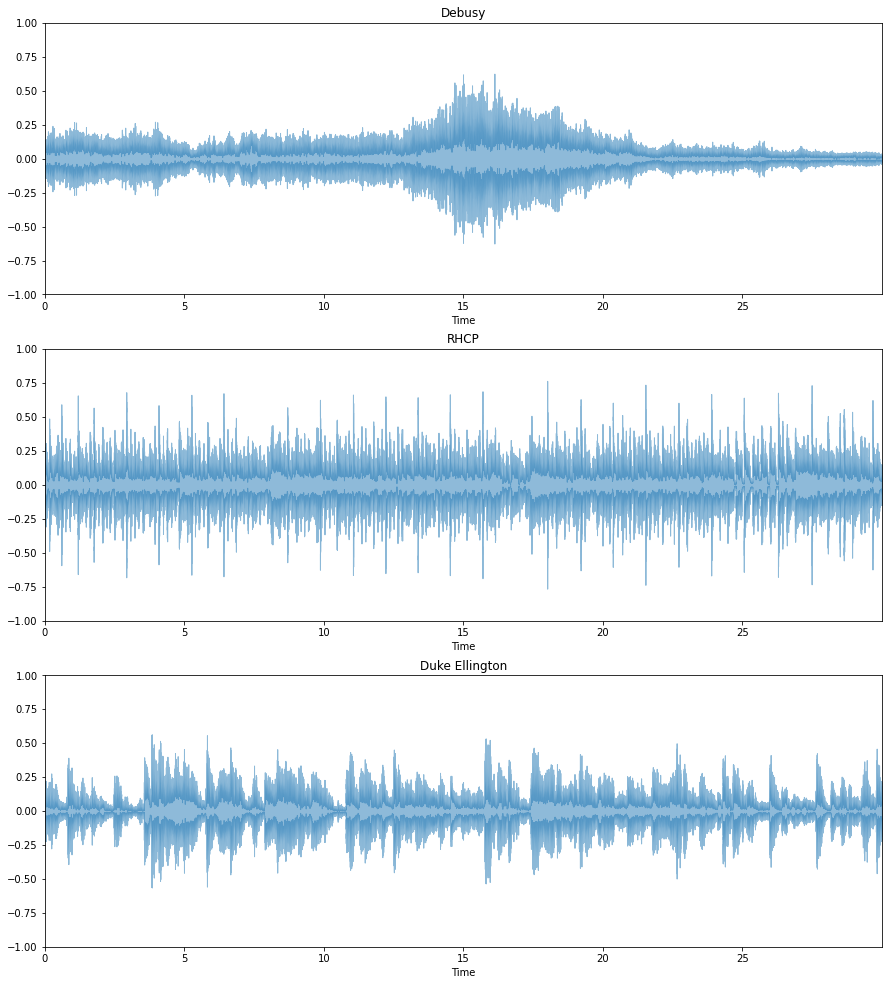

In [12]:
plt.figure(figsize=(15, 17))

plt.subplot(3, 1, 1)
librosa.display.waveplot(debussy, alpha=0.5)
plt.ylim((-1, 1))
plt.title("Debusy")

plt.subplot(3, 1, 2)
librosa.display.waveplot(redhot, alpha=0.5)
plt.ylim((-1, 1))
plt.title("RHCP")

plt.subplot(3, 1, 3)
librosa.display.waveplot(duke, alpha=0.5)
plt.ylim((-1, 1))
plt.title("Duke Ellington")

plt.show()

# Calculating amplitude envelope

In [13]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

def amplitude_envelope(signal, frame_size, hop_length):
    """Calculate the amplitude envelope of a signal with a given frame size nad hop length."""
    amplitude_envelope = []
    
    # calculate amplitude envelope for each frame
    for i in range(0, len(signal), hop_length): 
        amplitude_envelope_current_frame = max(signal[i:i+frame_size]) 
        amplitude_envelope.append(amplitude_envelope_current_frame)
    
    return np.array(amplitude_envelope)

In [14]:
def fancy_amplitude_envelope(signal, frame_size, hop_length):
    """Fancier Python code to calculate the amplitude envelope of a signal with a given frame size."""
    return np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_length)])

In [15]:
# number of frames in amplitude envelope
ae_debussy = amplitude_envelope(debussy, FRAME_SIZE, HOP_LENGTH)
len(ae_debussy)

1292

In [16]:
# calculate amplitude envelope for RHCP and Duke Ellington
ae_redhot = amplitude_envelope(redhot, FRAME_SIZE, HOP_LENGTH)
ae_duke = amplitude_envelope(duke, FRAME_SIZE, HOP_LENGTH)

# Visualising amplitude envelope

In [17]:
frames = range(len(ae_debussy))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

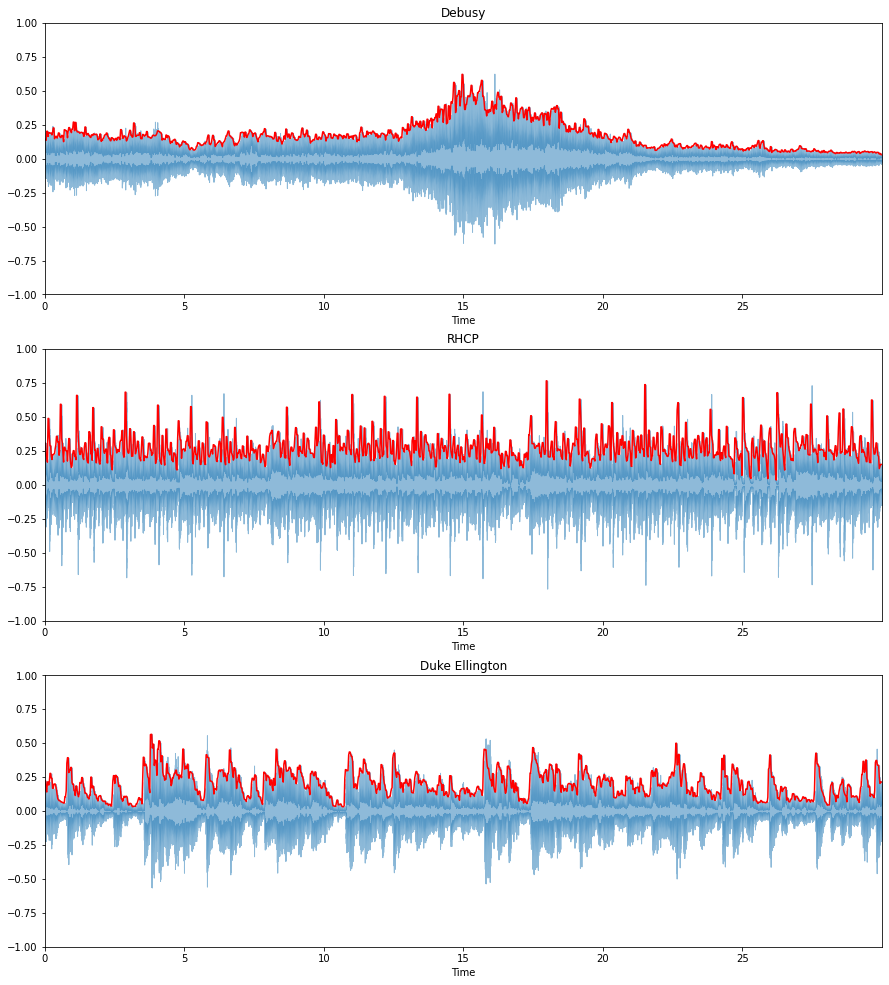

In [18]:
# amplitude envelope is graphed in red

plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveplot(debussy, alpha=0.5)
plt.plot(t, ae_debussy, color="r")
plt.ylim((-1, 1))
plt.title("Debusy")

plt.subplot(3, 1, 2)
librosa.display.waveplot(redhot, alpha=0.5)
plt.plot(t, ae_redhot, color="r")
plt.ylim((-1, 1))
plt.title("RHCP")

plt.subplot(3, 1, 3)
librosa.display.waveplot(duke, alpha=0.5)
plt.plot(t, ae_duke, color="r")
plt.ylim((-1, 1))
plt.title("Duke Ellington")

plt.show()

# Root-mean-squared energy with Librosa

In [19]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

In [20]:
rms_debussy = librosa.feature.rms(debussy, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_redhot = librosa.feature.rms(redhot, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_duke = librosa.feature.rms(duke, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

# Visualise RMSE + waveform

In [21]:
frames = range(len(rms_debussy))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

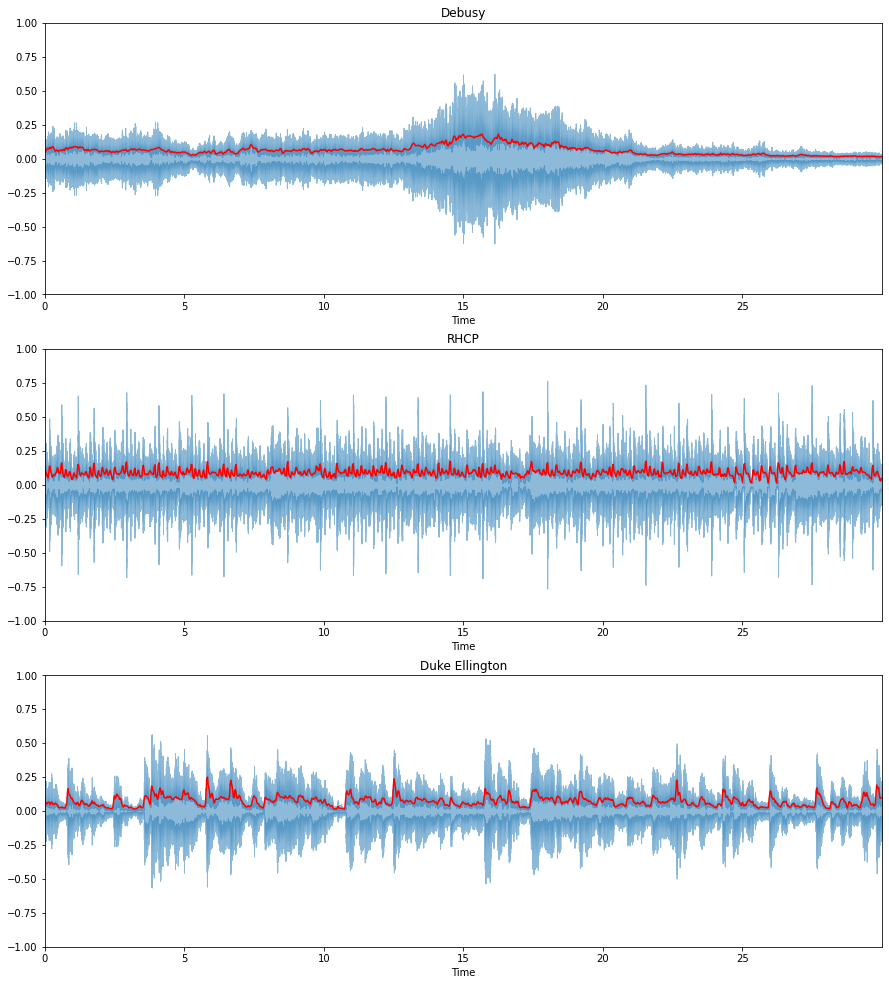

In [22]:
# rms energy is graphed in red

plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveplot(debussy, alpha=0.5)
plt.plot(t, rms_debussy, color="r")
plt.ylim((-1, 1))
plt.title("Debusy")

plt.subplot(3, 1, 2)
librosa.display.waveplot(redhot, alpha=0.5)
plt.plot(t, rms_redhot, color="r")
plt.ylim((-1, 1))
plt.title("RHCP")

plt.subplot(3, 1, 3)
librosa.display.waveplot(duke, alpha=0.5)
plt.plot(t, rms_duke, color="r")
plt.ylim((-1, 1))
plt.title("Duke Ellington")

plt.show()

# RMSE from scratch

In [23]:
def rmse(signal, frame_size, hop_length):
    rmse = []
    
    # calculate rmse for each frame
    for i in range(0, len(signal), hop_length): 
        rmse_current_frame = np.sqrt(sum(signal[i:i+frame_size]**2) / frame_size)
        rmse.append(rmse_current_frame)
    return np.array(rmse)  

In [24]:
rms_debussy1 = rmse(debussy, FRAME_SIZE, HOP_LENGTH)
rms_redhot1 = rmse(redhot, FRAME_SIZE, HOP_LENGTH)
rms_duke1 = rmse(duke, FRAME_SIZE, HOP_LENGTH)

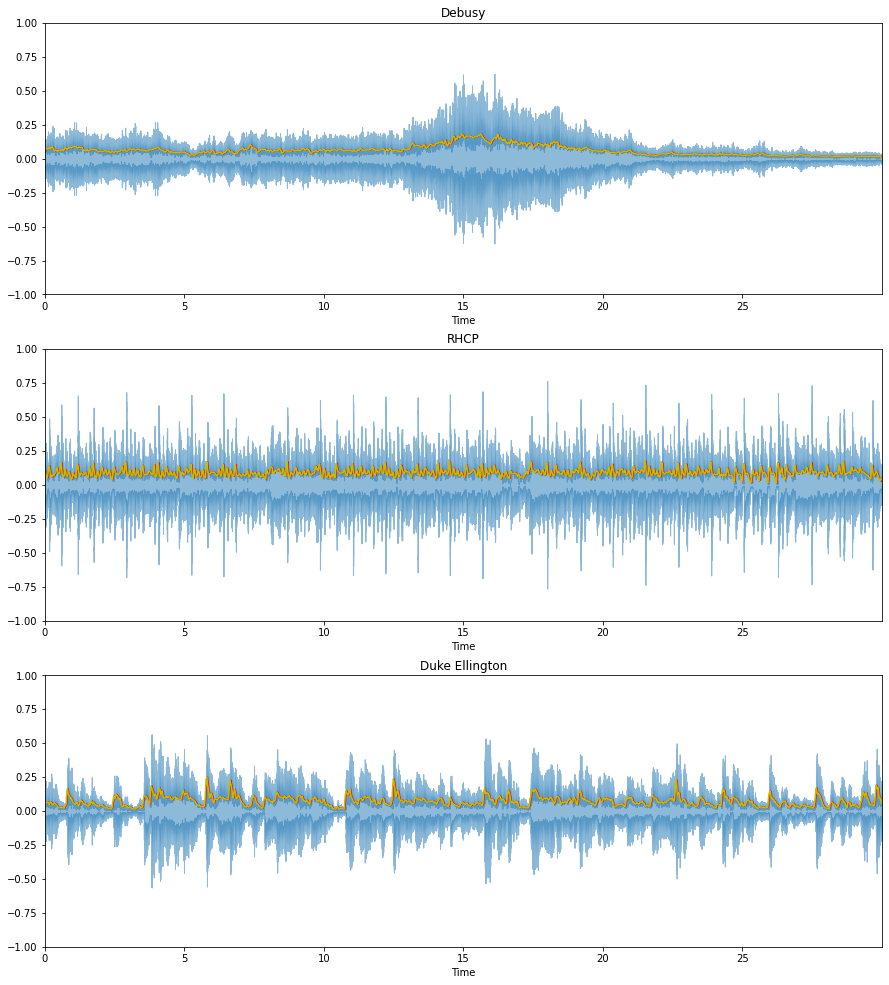

In [25]:
plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveplot(debussy, alpha=0.5)
plt.plot(t, rms_debussy, color="r")
plt.plot(t, rms_debussy1, color="y")
plt.ylim((-1, 1))
plt.title("Debusy")

plt.subplot(3, 1, 2)
librosa.display.waveplot(redhot, alpha=0.5)
plt.plot(t, rms_redhot, color="r")
plt.plot(t, rms_redhot1, color="y")
plt.ylim((-1, 1))
plt.title("RHCP")

plt.subplot(3, 1, 3)
librosa.display.waveplot(duke, alpha=0.5)
plt.plot(t, rms_duke, color="r")
plt.plot(t, rms_duke1, color="y")
plt.ylim((-1, 1))
plt.title("Duke Ellington")

plt.show()

# Zero-crossing rate with Librosa

In [27]:
zcr_debussy = librosa.feature.zero_crossing_rate(debussy, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_redhot = librosa.feature.zero_crossing_rate(redhot, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_duke = librosa.feature.zero_crossing_rate(duke, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [28]:
zcr_debussy.size

1292

# Visualise zero-crossing rate with Librosa

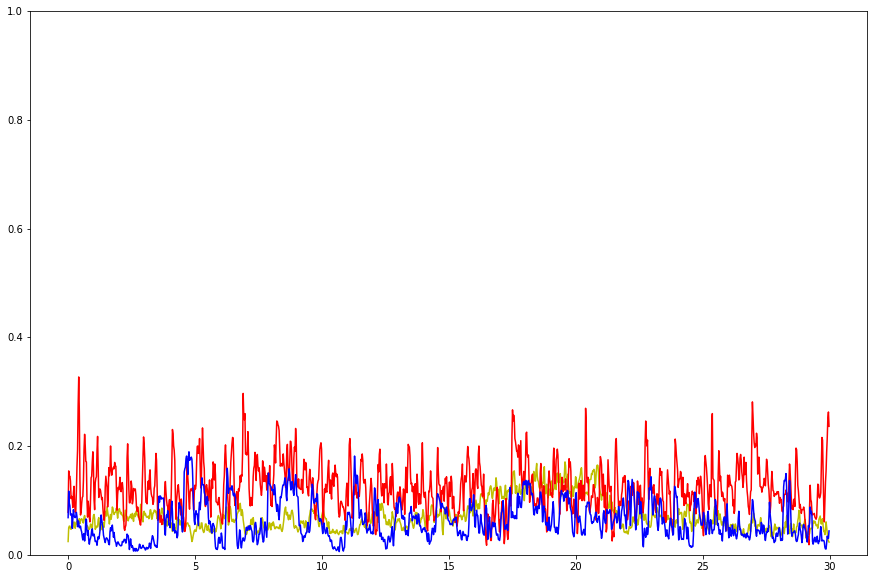

In [29]:
plt.figure(figsize=(15, 10))

plt.plot(t, zcr_debussy, color="y")
plt.plot(t, zcr_redhot, color="r")
plt.plot(t, zcr_duke, color="b")
plt.ylim(0, 1)
plt.show()

# ZCR: Voice vs Noise

In [30]:
voice_file = "voice.wav"
noise_file = "noise.wav"

In [ ]:
ipd.Audio(voice_file)

In [ ]:
ipd.Audio(noise_file)

In [33]:
# load audio files
voice, _ = librosa.load(voice_file, duration=15)
noise, _ = librosa.load(noise_file, duration=15)

In [34]:
# get ZCR
zcr_voice = librosa.feature.zero_crossing_rate(voice, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_noise = librosa.feature.zero_crossing_rate(noise, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [35]:
frames = range(len(zcr_voice))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

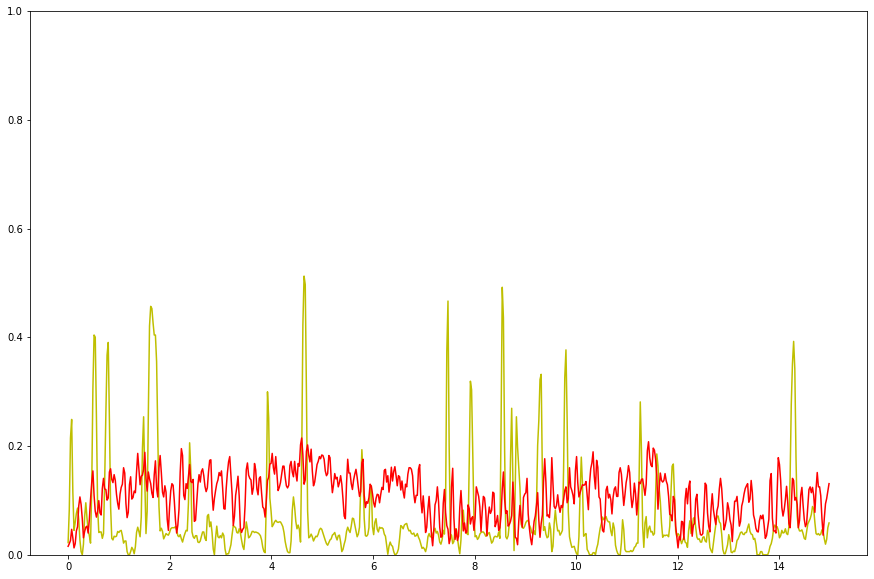

In [36]:
plt.figure(figsize=(15, 10))

plt.plot(t, zcr_voice, color="y")
plt.plot(t, zcr_noise, color="r")
plt.ylim(0, 1)
plt.show()

In [40]:
%pwd

'/content/drive/MyDrive/리듬스터디/DSP'

In [42]:
from google.colab import drive
drive.mount("/content/drive")
%cd '/content/drive/MyDrive/리듬스터디/DSP'
!jupyter nbconvert --to markdown "Time Domain Audio Features and Implementation.ipynb"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/리듬스터디/DSP
[NbConvertApp] Converting notebook Time Domain Audio Features and Implementation.ipynb to markdown
[NbConvertApp] Support files will be in Time Domain Audio Features and Implementation_files/
[NbConvertApp] Making directory Time Domain Audio Features and Implementation_files
[NbConvertApp] Making directory Time Domain Audio Features and Implementation_files
[NbConvertApp] Making directory Time Domain Audio Features and Implementation_files
[NbConvertApp] Making directory Time Domain Audio Features and Implementation_files
[NbConvertApp] Making directory Time Domain Audio Features and Implementation_files
[NbConvertApp] Making directory Time Domain Audio Features and Implementation_files
[NbConvertApp] Writing 7065905 bytes to Time Domain Audio Features and Implementation.md
